In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set()
rcParams['figure.figsize'] = 7, 5
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)

In [2]:
norm_rv = stats.norm(loc=30, scale=5)
samples = np.trunc(norm_rv.rvs(365))
samples[:30]

array([32., 29., 33., 37., 28., 28., 37., 33., 27., 32., 27., 27., 31.,
       20., 21., 27., 24., 31., 25., 22., 37., 28., 30., 22., 27., 30.,
       24., 31., 26., 28.])

In [3]:
samples.mean(), samples.std()

(29.52054794520548, 4.77410133275075)

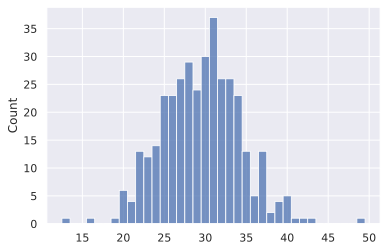

In [4]:
sns.histplot(x=samples, discrete=True);

In [5]:
# Количество доставок, которые будут попадать в коридор от 25 до 35
N = 5000
t_data = norm_rv.rvs(N)
t_data[(25 < t_data) & (t_data < 35)].size/N

0.6854

In [6]:
# Доля значений, превосходящих 40
t_data[t_data > 40].size/N

0.0232

In [7]:
# z= (40-30)/5 

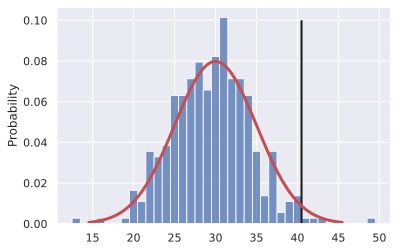

In [8]:
# Высота прямоугольников показывает не количество вхождений каждого значения в выборку, а вероятность их появления в выборке. 
# Красная линия - функция распределения плотности вероятности значений времени доставки. 
fig, ax = plt.subplots()
x = np.linspace(norm_rv.ppf(0.001), norm_rv.ppf(0.999), 200)
ax.vlines(40.5, 0, 0.1, color='k', lw=2)
sns.lineplot(x=x, y=norm_rv.pdf(x), color='r', lw=3)
sns.histplot(x=samples, stat='probability', discrete=True)

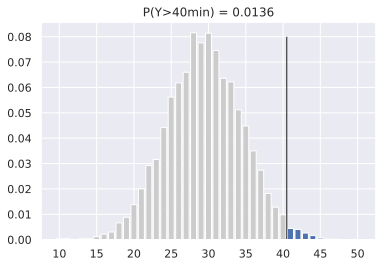

In [9]:
# Моделируем 5000 доставок, строим гистограмму и находим сумму высот прямоугольников, расположенных правее черной линии.
N = 5000
values = np.trunc(norm_rv.rvs(N))

fig, ax = plt.subplots()
v_le_41 = np.histogram(values, np.arange(9.5, 41.5))
v_ge_40 = np.histogram(values, np.arange(40.5, 51.5))
ax.bar(np.arange(10, 41), v_le_41[0]/N, color='0.8')
ax.bar(np.arange(41, 51), v_ge_40[0]/N)
p = np.sum(v_ge_40[0]/N)
ax.set_title('P(Y>40min) = {:.3}'.format(p))
ax.vlines(40.5, 0, 0.08, color='k', lw=1)

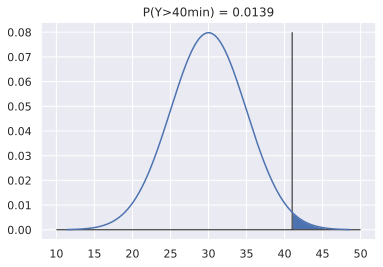

In [10]:
# Значения берутся из нормального распределения - можно воспользоваться функцией распределения плотности вероятности нормального распределения. 
# Функция распределения плотности хороша тем, что площадь под ней всегда равна единице. 
# Если нас интересует вероятность того, что величина примет значение большее или меньшее указанного, то достаточно найти площадь под функцией которая находится правее или левее этого значения. 
fig, ax = plt.subplots()

x = np.linspace(norm_rv.ppf(0.0001), norm_rv.ppf(0.9999), 300)
ax.plot(x, norm_rv.pdf(x))

ax.fill_between(x[x>41], norm_rv.pdf(x[x>41]), np.zeros(len(x[x>41])))
p = 1 - norm_rv.cdf(41)
ax.set_title('P(Y>40min) = {:.3}'.format(p))
ax.hlines(0, 10, 50, lw=1, color='k')
ax.vlines(41, 0, 0.08, color='k', lw=1)

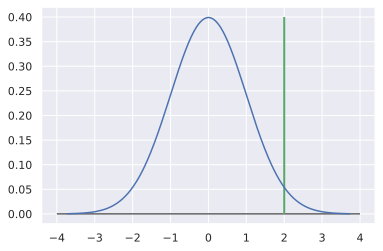

In [11]:
# Нормальное распределение
fig, ax = plt.subplots()
N_rv = stats.norm()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, -4, 4, lw=1, color='k')
ax.vlines(2, 0, 0.4, color='g', lw=2)

In [12]:
# z= (40-30)/5 
# Z-значение для сорока (Z = 2), позволяет оценить долю (вероятность появления) значений больших сорока:
print(1 - N_rv.cdf(2))

0.02275013194817921


In [13]:
# Вероятность среднего арифметического значений нужно воспользоваться Z-статистикой.
# Z-статистика, как и Z-значение является стандартизированной величиной и так же измеряется в сигмах, что позволяет использовать стандартное нормальное распределение для подсчета вероятностей.
# Среднее арифметическое трех значений 35
# z = (35-30)/(5/корень 3) = 1,73

In [14]:
# Фактически мы задаемся вопросом, а какова вероятность того, что среднее попадет в промежуток 25 до 35
N = 10000
means = np.trunc(norm_rv.rvs(size=(N, 3))).mean(axis=1)
means[(means>=25)&(means<=35)].size/N

0.9238

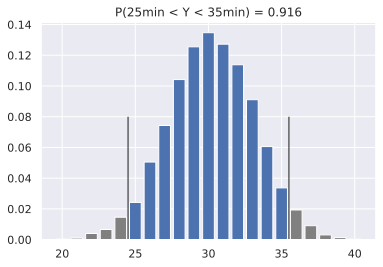

In [15]:
N = 10000
fig, ax = plt.subplots()
means = np.trunc(norm_rv.rvs(size=(N, 3))).mean(axis=1)
h = np.histogram(means, np.arange(19, 41))
ax.bar(np.arange(20, 25), h[0][0:5]/N, color='0.5')
ax.bar(np.arange(25, 36), h[0][5:16]/N)
ax.bar(np.arange(36, 41), h[0][16:22]/N, color='0.5')
p = np.sum(h[0][6:16]/N)
ax.set_title('P(25min < Y < 35min) = {:.3}'.format(p))
ax.vlines([24.5 ,35.5], 0, 0.08, color='k', lw=1)

Text(0.5, 1.0, 'P(-1.73 < z < 1.73) = 0.917')

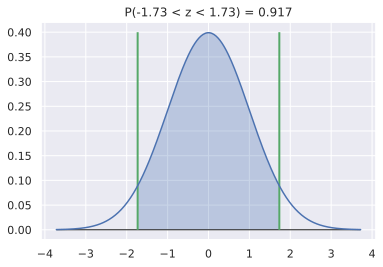

In [16]:
x, n, mu, sigma = 35, 3, 30, 5
z = abs((x - mu)/(sigma/n**0.5))

N_rv = stats.norm()
fig, ax = plt.subplots()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.vlines([-z, z], 0, 0.4, color='g', lw=2)
x_z = x[(x>-z) & (x<z)] # & (x<z)
ax.fill_between(x_z, N_rv.pdf(x_z), np.zeros(len(x_z)), alpha=0.3)

p = N_rv.cdf(z) - N_rv.cdf(-z)
ax.set_title('P({:.3} < z < {:.3}) = {:.3}'.format(-z, z, p))

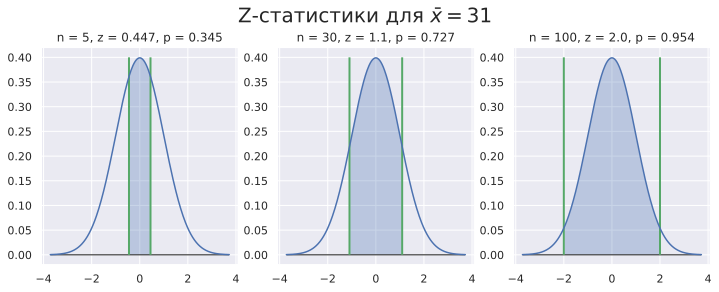

In [17]:
# Z-статистика зависит как от среднего выборки, так и от величины выборки
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12, 4))

for i, n in enumerate([5, 30, 100]):
    x, mu, sigma = 31, 30, 5
    z = abs((x - mu)/(sigma/n**0.5))

    N_rv = stats.norm()
    x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
    ax[i].plot(x, N_rv.pdf(x))
    ax[i].hlines(0, x.min(), x.max(), lw=1, color='k')
    ax[i].vlines([-z, z], 0, 0.4, color='g', lw=2)
    x_z = x[(x>-z) & (x<z)] # & (x<z)
    ax[i].fill_between(x_z, N_rv.pdf(x_z), np.zeros(len(x_z)), alpha=0.3)

    p = N_rv.cdf(z) - N_rv.cdf(-z)
    ax[i].set_title('n = {}, z = {:.3}, p = {:.3}'.format(n, z, p));
fig.suptitle(r'Z-статистики для $\bar{x} = 31$', fontsize = 20, y=1.02);

Text(0.5, 1.0, 'P(-3.81 < z < 3.81) = 1.0')

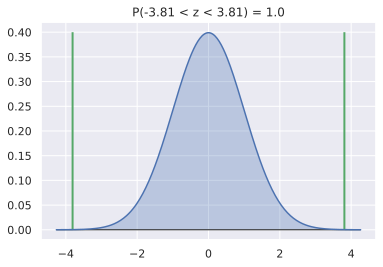

In [18]:
x, n, mu, sigma = 41, 3, 30, 5
z = abs((x - mu)/(sigma/3**0.5))

N_rv = stats.norm()
fig, ax = plt.subplots()
x = np.linspace(N_rv.ppf(1e-5), N_rv.ppf(1-1e-5), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.vlines([-z, z], 0, 0.4, color='g', lw=2)
x_z = x[(x>-z) & (x<z)] # & (x<z)
ax.fill_between(x_z, N_rv.pdf(x_z), np.zeros(len(x_z)), alpha=0.3)

p = N_rv.cdf(z) - N_rv.cdf(-z)
ax.set_title('P({:.3} < z < {:.3}) = {:.3}'.format(-z, z, p))

In [19]:
# Z-статистика позволяет оценить вероятность того, что среднее выборки размером n, взятой из генеральной совокупности попадет в заданный интервал значений.
# Это удобно тем, что позволяет сделать вывод о случайности полученного среднего. 
# Чем меньше модуль значения Z-статистики, тем меньше достоверность среднего. 

In [20]:
# Фактически, значение вероятности 0.65, полученное выше - это и есть то самое p-value которое как раз и показывает вероятность случайного выхода за границы интервала, задаваемого значением Z-статистики

Text(0.5, 1.0, 'P(-0.447 < z < 0.447) = 0.345')

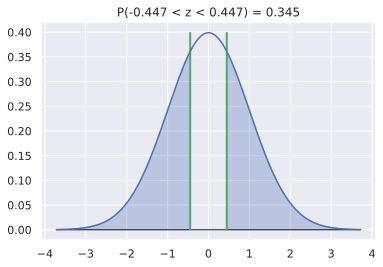

In [21]:
x, n, mu, sigma = 31, 5, 30, 5
z = abs((x - mu)/(sigma/n**0.5))
N_rv = stats.norm()
fig, ax = plt.subplots()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.vlines([-z, z], 0, 0.4, color='g', lw=2)
x_le_z, x_ge_z = x[x<-z], x[x>z]
ax.fill_between(x_le_z, N_rv.pdf(x_le_z), np.zeros(len(x_le_z)), alpha=0.3, color='b')
ax.fill_between(x_ge_z, N_rv.pdf(x_ge_z), np.zeros(len(x_ge_z)), alpha=0.3, color='b')

p = N_rv.cdf(z) - N_rv.cdf(-z)
ax.set_title('P({:.3} < z < {:.3}) = {:.3}'.format(-z, z, p))

In [22]:
# Чем меньше p-value тем меньше вероятность того, что среднее выборки получено случайно. 
# При этом p-value напрямую связано с двусторонними гипотезами, т.е. гипотезами о попадании величины в заданный интервал. 
# Если мы получили какие-то результаты, но p-value оказалось довольно большим, то вряд ли эти результаты могут считаться значимыми. 
# Причем, традиционно, уровень значимости, обозначаемый буквой альфа равен 0.05, 
# Для подтверждения значимости результатов p-value должно быть меньше этого уровня. 

In [23]:
# Чтобы подтвердить небольшие отклонения от среднего генеральной совокупности, придется очень сильно увеличивать размер выборки.